In [3]:
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")

In [4]:
def make_simple_plot():
    fig, axes=plt.subplots(figsize=(12,5), nrows=1, ncols=2);
    axes[0].set_ylabel("$y$")
    axes[0].set_xlabel("$x$")
    axes[1].set_xlabel("$x$")
    axes[1].set_yticklabels([])
    axes[0].set_ylim([-2,2])
    axes[1].set_ylim([-2,2])
    plt.tight_layout();
    return axes
def make_plot():
    fig, axes=plt.subplots(figsize=(20,8), nrows=1, ncols=2);
    axes[0].set_ylabel("$p_R$")
    axes[0].set_xlabel("$x$")
    axes[1].set_xlabel("$x$")
    axes[1].set_yticklabels([])
    axes[0].set_ylim([0,1])
    axes[1].set_ylim([0,1])
    axes[0].set_xlim([0,1])
    axes[1].set_xlim([0,1])
    plt.tight_layout();
    return axes

In [5]:
df = pd.read_csv('religion.csv')

In [6]:
df.head()

,promney,rfrac
0,0.047790,0.00
1,0.051199,0.01
2,0.054799,0.02
3,0.058596,0.03
4,0.062597,0.04


In [8]:
x=df.rfrac.values

In [9]:
y=df.promney.values

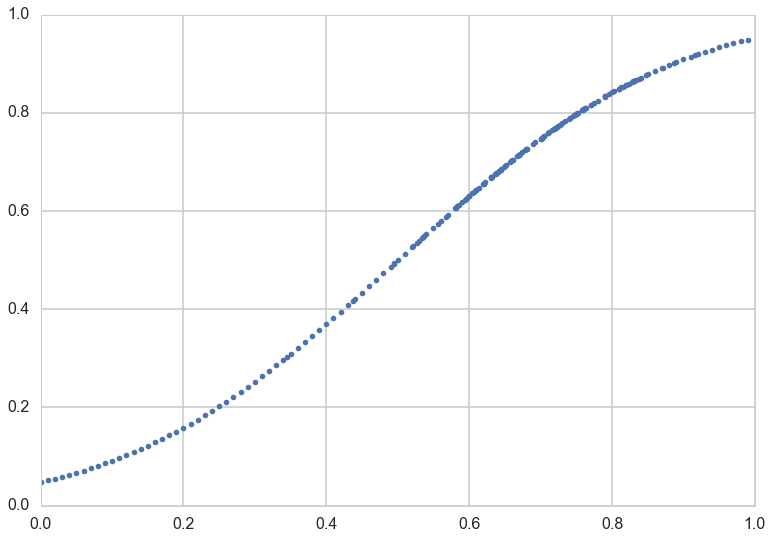

In [11]:
plt.plot(x,y, '.')

In [15]:
x.shape[0]

200L

In [17]:
indexes = np.sort(np.random.choice(x.shape[0], size=30, replace=False))

In [20]:
samplex=x[indexes]
sampley=y[indexes]

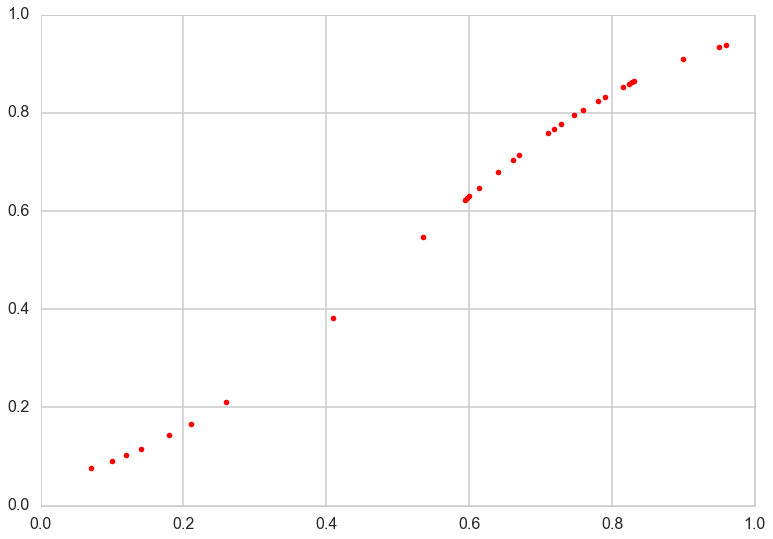

In [24]:
#plt.plot(x,y, '.')
plt.plot(samplex,sampley, 'r.')

In [27]:
np.poly1d?

In [29]:
np.polyfit?

In [31]:
fit = np.polyfit(x[indexes],y[indexes],1)

In [36]:
#best fit g1 for data D in H1
g1 = np.poly1d(fit)

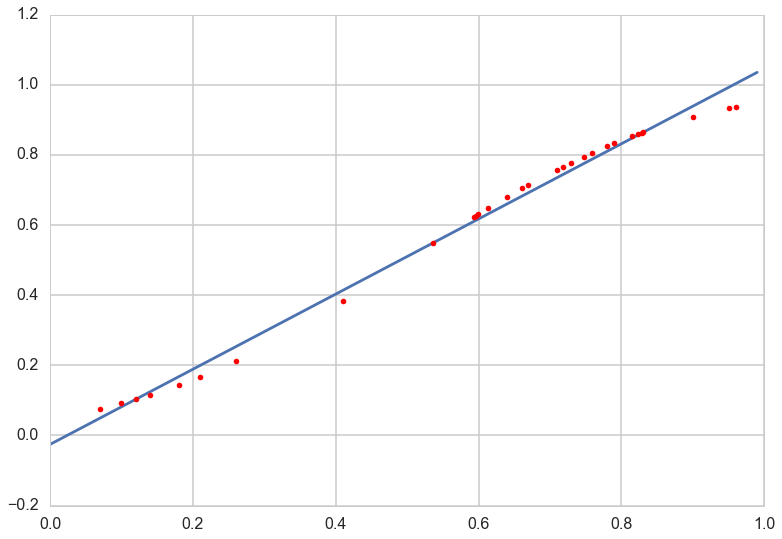

In [38]:
plt.plot(x, g1(x))
plt.plot(samplex,sampley, 'r.')

In [39]:
fit20 = np.polyfit(x[indexes], y[indexes], 20)

C:\Anaconda2\lib\site-packages\numpy\lib\polynomial.py:595: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)


In [40]:
g20 = np.poly1d(fit20)

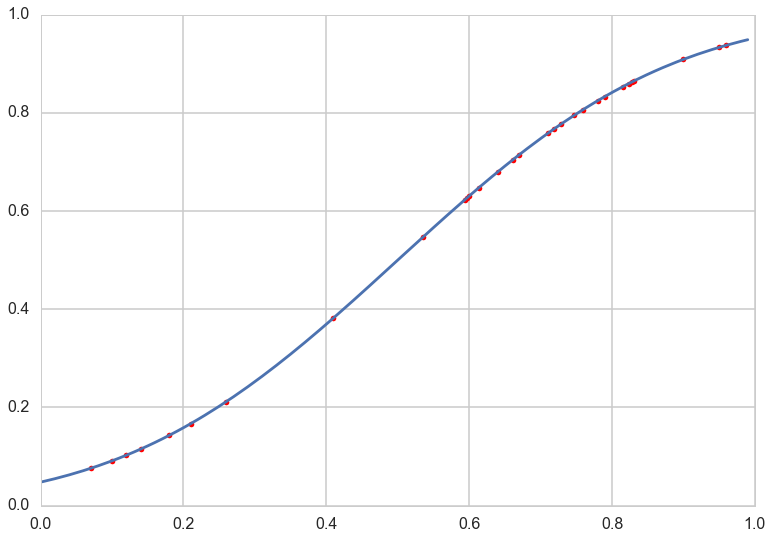

In [41]:
plt.plot(samplex,sampley, 'r.')
plt.plot(x,g20(x))

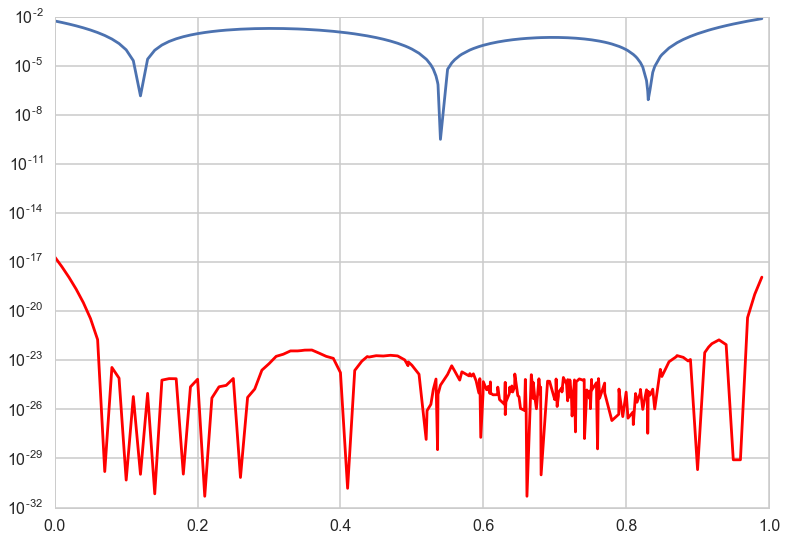

In [49]:
plt.plot(x, (g1(x)-y)**2)
plt.plot(x, (g20(x)-y)**2, 'r')
plt.yscale('log')

In [50]:
sns.kdeplot?

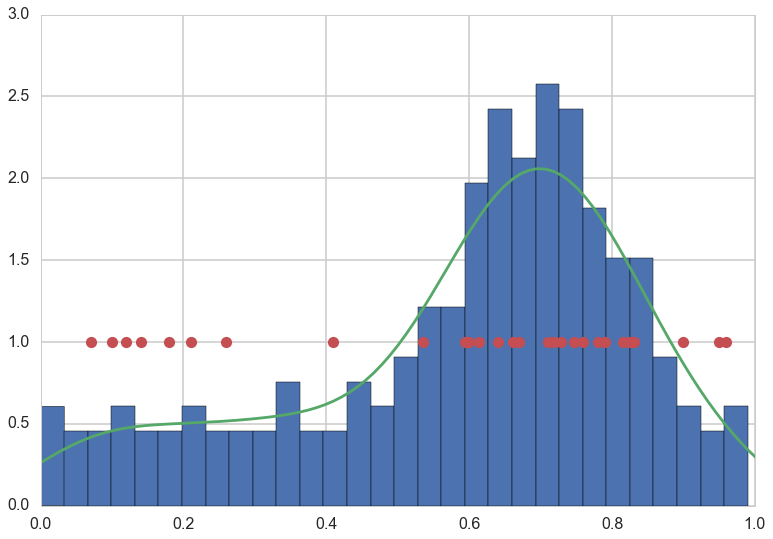

In [62]:
plt.hist(x, normed=True, bins=30);
sns.kdeplot(x)
plt.xlim([0,1])
plt.plot(x[indexes], [1.0]*len(x[indexes]),'o')

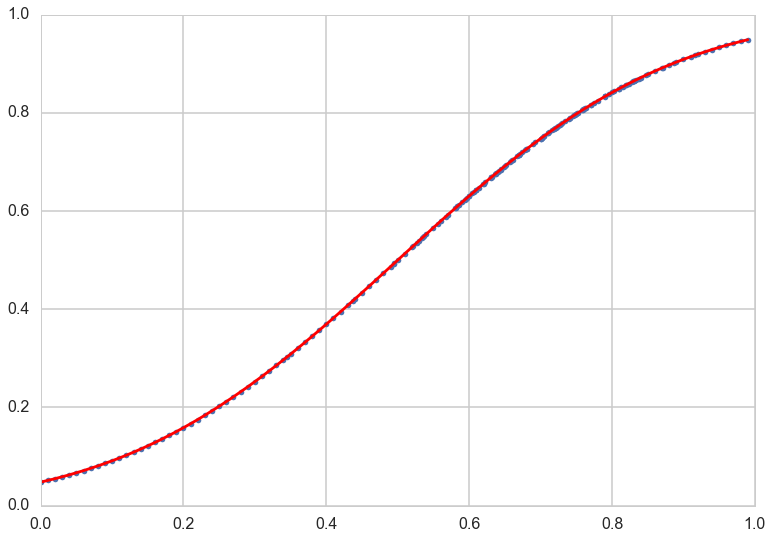

In [64]:
plt.plot(x,y, '.')
plt.plot(x, g20(x),'r')

In [85]:
sigma=0.06
mask=(x > 0.65) & (x < 0.8)
sigmalist=sigma+mask*0.03

In [86]:
y1 = y + sp.stats.norm.rvs(scale=sigmalist, size=200)
#the next three lines just ensure that y remains a probability
yadd = (y1 < 0.0) *(0.01-y1)
ysub = (y1 > 1.0)*(y1 - 1.0)
y1 = y1 + yadd -ysub

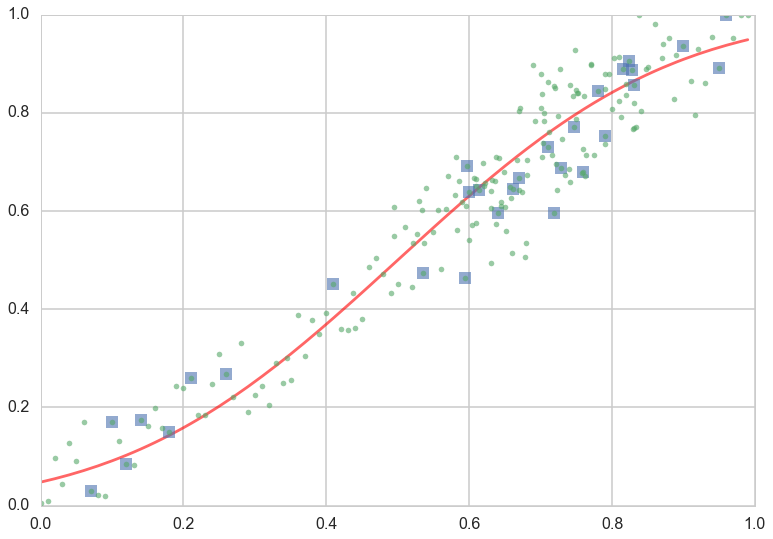

In [87]:
plt.plot(x,y, 'r-', alpha=0.6, label="f");
plt.plot(x[indexes], y1[indexes], 's', alpha=0.6, label="in-sample y (observed)");
plt.plot(x, y1, '.', alpha=0.6, label="population y");

In [90]:
g1noisy = np.poly1d(np.polyfit(x[indexes],y1[indexes],1))
g20noisy = np.poly1d(np.polyfit(x[indexes],y1[indexes],20))

C:\Anaconda2\lib\site-packages\numpy\lib\polynomial.py:595: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)


(0, 1)

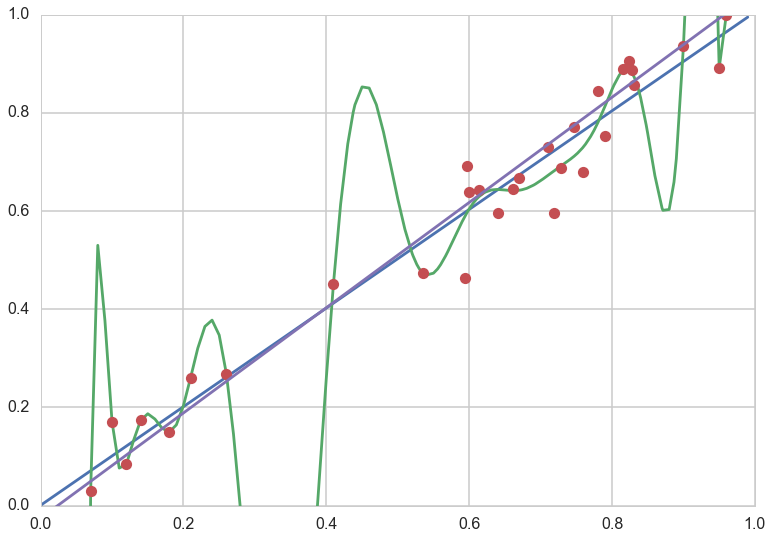

In [94]:
plt.plot(x,g1noisy(x))
plt.plot(x,g20noisy(x))
plt.plot(x[indexes], y1[indexes], 'o')
plt.plot(x, g1(x), '-')
plt.ylim([0,1])

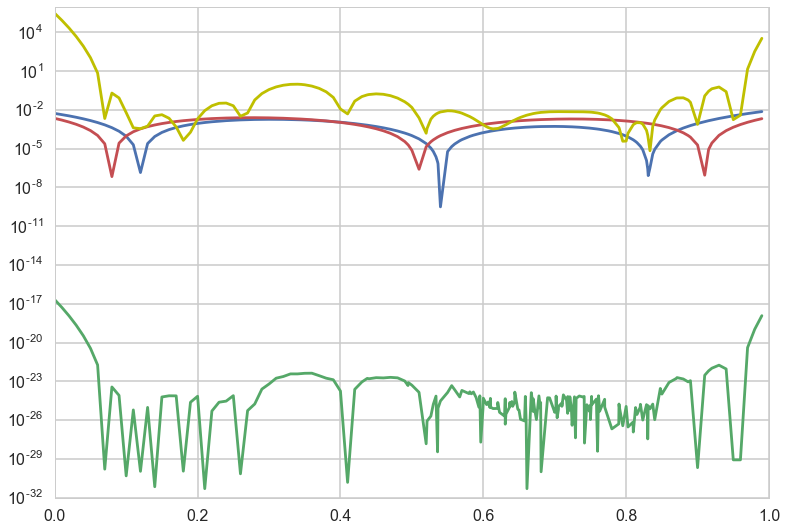

In [100]:
plt.plot(x, (g1(x)-y)**2)
plt.plot(x, (g20(x)-y)**2)
plt.plot(x, (g1noisy(x)-y)**2)
plt.plot(x, (g20noisy(x)-y)**2, 'y')
plt.yscale('log')

In [101]:
np. random.choice?

Object `random.choice` not found.


In [103]:
np.random.choice?

In [106]:
def gen (nsims,degree,size, x, y):
    poly = []
    for i in range(nsims):
        indexes = np.random.choice(x.shape[0], size=size, replace=False)
        fit = np.polyfit(x[indexes], y[indexes],degree)
        g = np.poly1d(fit)
        poly.append(g)
    return poly


In [108]:
polys1 = gen(200, 1, 30, x, y1);
polys20 = gen(200, 20, 30,x,y1);

C:\Anaconda2\lib\site-packages\numpy\lib\polynomial.py:595: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)
C:\Anaconda2\lib\site-packages\numpy\lib\polynomial.py:595: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)
C:\Anaconda2\lib\site-packages\numpy\lib\polynomial.py:595: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)
C:\Anaconda2\lib\site-packages\numpy\lib\polynomial.py:595: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)
C:\Anaconda2\lib\site-packages\numpy\lib\polynomial.py:595: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)
C:\Anaconda2\lib\site-packages\numpy\lib\polynomial.py:595: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)
C:\Anaconda2\lib\site-packages\numpy\lib\polynomial.py:595: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)
C:\Anaconda2\

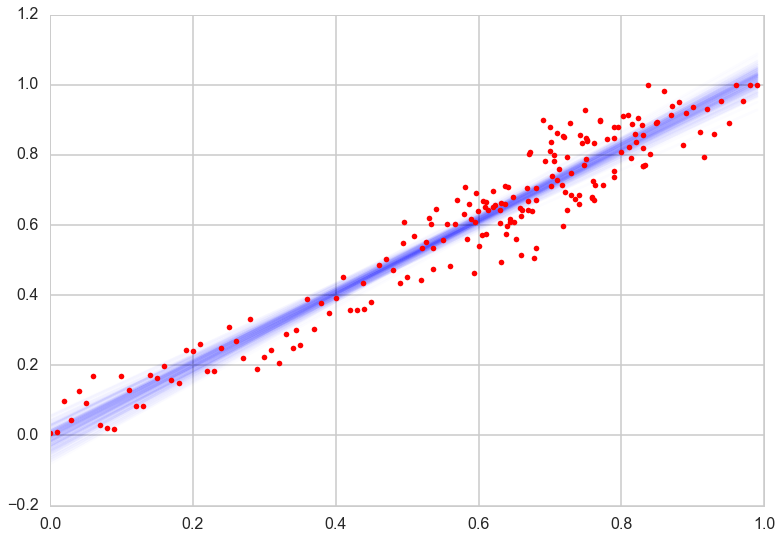

In [125]:
for i in range(len(polys1)):
    plt.plot(x, polys1[i](x),alpha=0.01, c='b')
    
plt.plot(x,y1,'.', c='r')

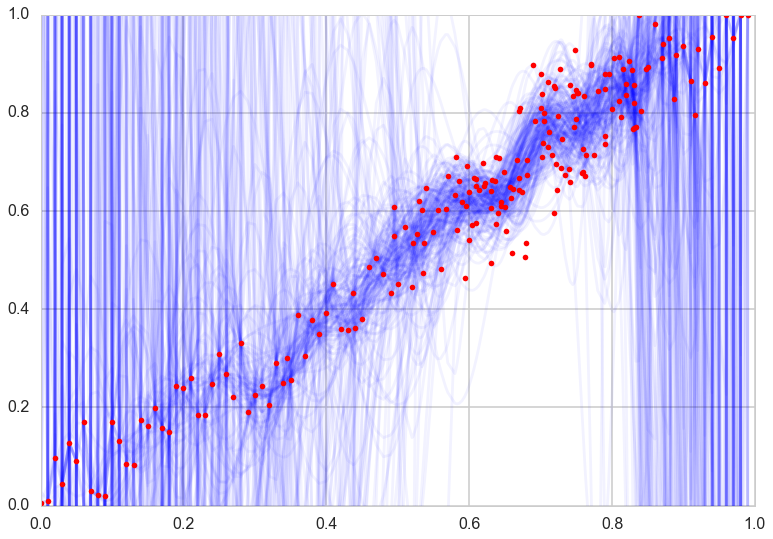

In [126]:
for i in range(len(polys20)):
    plt.plot(x, polys20[i](x), alpha=0.05, c='b')
plt.ylim([0,1])
plt.plot(x,y1,'.', c='r')

In [127]:
from sklearn.cross_validation import train_test_split


In [128]:
df = pd.DataFrame(dict(x = x[indexes], f= y[indexes], y=y1[indexes]))

In [129]:
df

,f,x,y
0,0.075881,0.070000,0.029276
1,0.091211,0.100000,0.169868
2,0.102637,0.120000,0.083973
3,0.115070,0.140000,0.173372
4,0.143061,0.180000,0.149958
5,0.166855,0.210000,0.260735
6,0.211855,0.260000,0.268828
7,0.382089,0.410000,0.452251
8,0.547716,0.535968,0.474182
9,0.622698,0.593772,0.464003


In [130]:
itrain, itest = train_test_split(range(30), train_size=24)

In [131]:
xtrain=df.x[itrain].values

In [133]:
ytrain=df.y[itrain].values
ftrain=df.f[itrain].values
xtest=df.x[itest].values
ytest=df.y[itest].values
ftest=df.f[itest].values

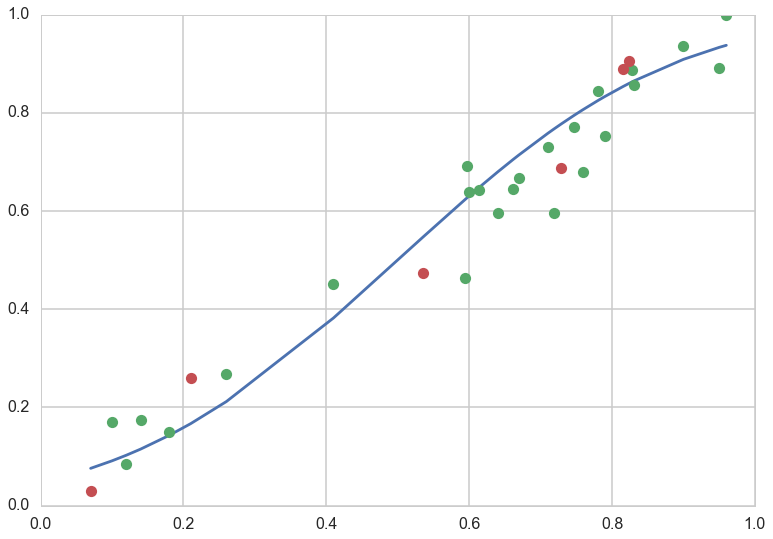

In [137]:
plt.plot(df.x, df.f)
plt.plot(xtrain,ytrain, 'o')
plt.plot(xtest,ytest, 'o')

In [138]:
from sklearn.preprocessing import PolynomialFeatures

In [144]:
PolynomialFeatures(2).fit_transform(xtrain.reshape(-1,1))

array([[ 1.        ,  0.59956518,  0.35947841],
       [ 1.        ,  0.1       ,  0.01      ],
       [ 1.        ,  0.66917186,  0.44779098],
       [ 1.        ,  0.78      ,  0.6084    ],
       [ 1.        ,  0.12      ,  0.0144    ],
       [ 1.        ,  0.18      ,  0.0324    ],
       [ 1.        ,  0.59643274,  0.35573201],
       [ 1.        ,  0.26      ,  0.0676    ],
       [ 1.        ,  0.64      ,  0.4096    ],
       [ 1.        ,  0.59377226,  0.35256549],
       [ 1.        ,  0.78965524,  0.62355539],
       [ 1.        ,  0.9       ,  0.81      ],
       [ 1.        ,  0.71      ,  0.5041    ],
       [ 1.        ,  0.74699252,  0.55799782],
       [ 1.        ,  0.41      ,  0.1681    ],
       [ 1.        ,  0.14      ,  0.0196    ],
       [ 1.        ,  0.96      ,  0.9216    ],
       [ 1.        ,  0.7181319 ,  0.51571342],
       [ 1.        ,  0.75868254,  0.5755992 ],
       [ 1.        ,  0.66111803,  0.43707705],
       [ 1.        ,  0.83090377,  0.690

In [148]:
xtrain.reshape((-1,1))

array([[ 0.59956518],
       [ 0.1       ],
       [ 0.66917186],
       [ 0.78      ],
       [ 0.12      ],
       [ 0.18      ],
       [ 0.59643274],
       [ 0.26      ],
       [ 0.64      ],
       [ 0.59377226],
       [ 0.78965524],
       [ 0.9       ],
       [ 0.71      ],
       [ 0.74699252],
       [ 0.41      ],
       [ 0.14      ],
       [ 0.96      ],
       [ 0.7181319 ],
       [ 0.75868254],
       [ 0.66111803],
       [ 0.83090377],
       [ 0.82850909],
       [ 0.95      ],
       [ 0.61360216]])

In [153]:
def make_features(degree, train_set, test_set):
    traintestlist =[]
    for i in degree:
        traintestdict={}
        traintestdict['train']= PolynomialFeatures(i).fit_transform(train_set.reshape((-1,1)))
        traintestdict['test']=PolynomialFeatures(i).fit_transform(test_set.reshape((-1,1)))
        traintestlist.append(traintestdict)
    return traintestlist

In [154]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [156]:
degree = range(21)
error_train = np.empty(len(degree))
error_test = np.empty(len(degree))
train_test_list = make_features(degree, xtrain,xtest)

In [157]:
train_test_list

[{'test': array([[ 1.],
         [ 1.],
         [ 1.],
         [ 1.],
         [ 1.],
         [ 1.]]), 'train': array([[ 1.],
         [ 1.],
         [ 1.],
         [ 1.],
         [ 1.],
         [ 1.],
         [ 1.],
         [ 1.],
         [ 1.],
         [ 1.],
         [ 1.],
         [ 1.],
         [ 1.],
         [ 1.],
         [ 1.],
         [ 1.],
         [ 1.],
         [ 1.],
         [ 1.],
         [ 1.],
         [ 1.],
         [ 1.],
         [ 1.],
         [ 1.]])}, {'test': array([[ 1.        ,  0.82327336],
         [ 1.        ,  0.21      ],
         [ 1.        ,  0.81523718],
         [ 1.        ,  0.07      ],
         [ 1.        ,  0.7290476 ],
         [ 1.        ,  0.53596824]]),
  'train': array([[ 1.        ,  0.59956518],
         [ 1.        ,  0.1       ],
         [ 1.        ,  0.66917186],
         [ 1.        ,  0.78      ],
         [ 1.        ,  0.12      ],
         [ 1.        ,  0.18      ],
         [ 1.        ,  0.59643274],
 

In [160]:
for d in degree:
    Xtrain = train_test_list[d]['train']
    Xtest = train_test_list[d]['test']
    est = LinearRegression()
    est.fit(Xtrain,ytrain)
    predict_train = est.predict(Xtrain)
    predict_test= est.predict(Xtest)
    error_train[d] = mean_squared_error(ytrain, predict_train)
    error_test[d] = mean_squared_error(ytest, predict_test)

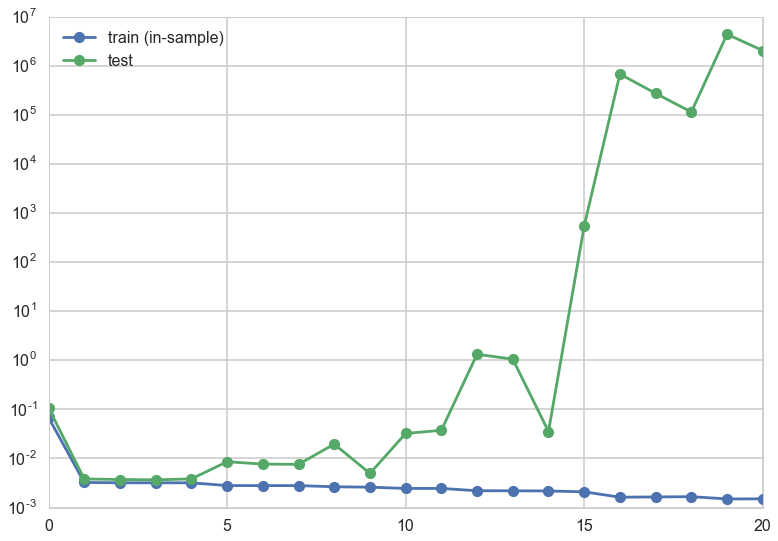

In [168]:
plt.plot(degree, error_train, marker='o', label='train (in-sample)')
plt.plot(degree, error_test, marker='o', label='test')
plt.yscale('log')
plt.legend(loc=2)

In [190]:
np.argmin(error_test)

3

In [176]:
error_test

array([  1.07734403e-01,   3.83585728e-03,   3.73362269e-03,
         3.67311714e-03,   3.84142601e-03,   8.60275624e-03,
         7.69179355e-03,   7.60505988e-03,   1.96377989e-02,
         4.96737051e-03,   3.23481132e-02,   3.74860461e-02,
         1.32814837e+00,   1.05222452e+00,   3.54516278e-02,
         5.46400184e+02,   6.74363136e+05,   2.72912497e+05,
         1.13588093e+05,   4.36293798e+06,   2.03017049e+06])

In [180]:
ixtrain, ixvalid = train_test_split(itrain, train_size= 18, test_size=6)

In [182]:
xntrain= df.x[ixtrain].values
fntrain = df.f[ixtrain].values
yntrain = df.y[ixtrain].values
xnvalid= df.x[ixvalid].values
fnvalid = df.f[ixvalid].values
ynvalid = df.y[ixvalid].values

In [199]:
degree = range(21)
error_train=np.empty(18)
error_valid=np.empty(18)
trainvalidlists=make_features(degree, xntrain, xnvalid)


In [200]:
for d in degree:
    model = LinearRegression()
     
    Xntrain = trainvalidlists[d]['train']
    Xnvalid = trainvalidlists[d]['test']
    print Xntrain.shape
    print Xnvalid.shape
    print yntrain.shape
    model.fit(Xntrain, yntrain)
    print 'test'
    print error_train.shape
    error_train[d] = mean_squared_error(yntrain, est.predict(Xntrain))
    error_valid[d] = mean_squared_error(ynvalid, est.predict(Xnvalid))
    

(18L, 1L)
(6L, 1L)
(18L,)
test
(18L,)


ValueError: shapes (18,1) and (21,) not aligned: 1 (dim 1) != 21 (dim 0)

In [201]:
xs = np.arange(-1.,1.,0.01)
ff = lambda x:np.sin(np.pi*x)
ffxs = ff(xs)

(-1, 1)

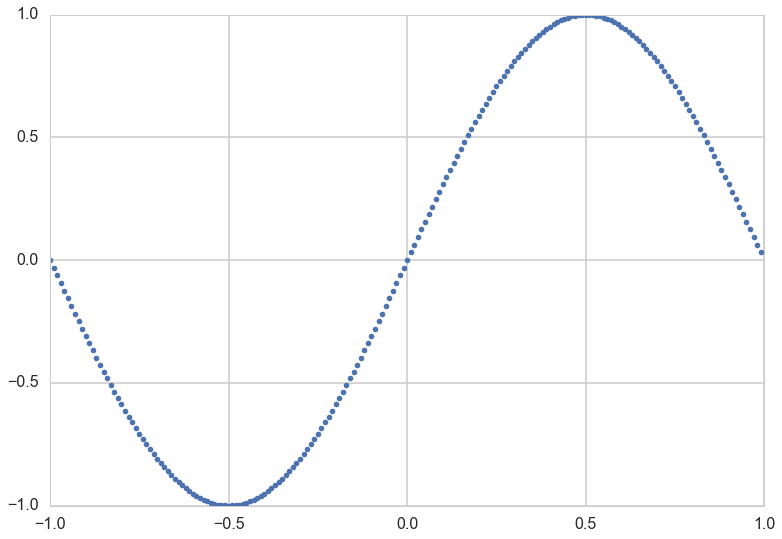

In [208]:
plt.plot(xs,ffxs, '.')
plt.xlim([-1,1])

In [ ]:
from sklearn.linear_model import Rigde
axes = 